In [1]:
import os
os.chdir("../../../../")

import numpy as np
import scipy
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from scripts.python.tsa.utsmodel import *
from scripts.python.tsa.ts_utils import *
from scripts.python.tsa.ts_eval import *

import warnings
warnings.filterwarnings('ignore')

## SARIMAX

,date,total,stringency_index,covid,solomon_islands_flights,solomon_islands_hotel,solomon_islands_travel
0,2009-01-01,1602,0.0,0.0,0.000000,0.0,0.000000
1,2009-02-01,1422,0.0,0.0,0.484667,0.0,0.203672
2,2009-03-01,1249,0.0,0.0,0.000000,0.0,0.000000
3,2009-04-01,1499,0.0,0.0,0.000000,0.0,0.000000
4,2009-05-01,1393,0.0,0.0,0.000000,0.0,0.478020


training size : 144, testing size : 0
THE BENCHMARK EVALUATION FOR TOTAL 

STARTED TO CONDUCT STEPWISE SEARCHING FOR TOTAL 

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -170.543
Date:                              Sat, 10 Jun 2023   AIC                            361.087
Time:                                      16:11:14   BIC                            390.715
Sample:                                           0   HQIC                           373.126
                                              - 144                                         
Covariance Type:                                opg                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

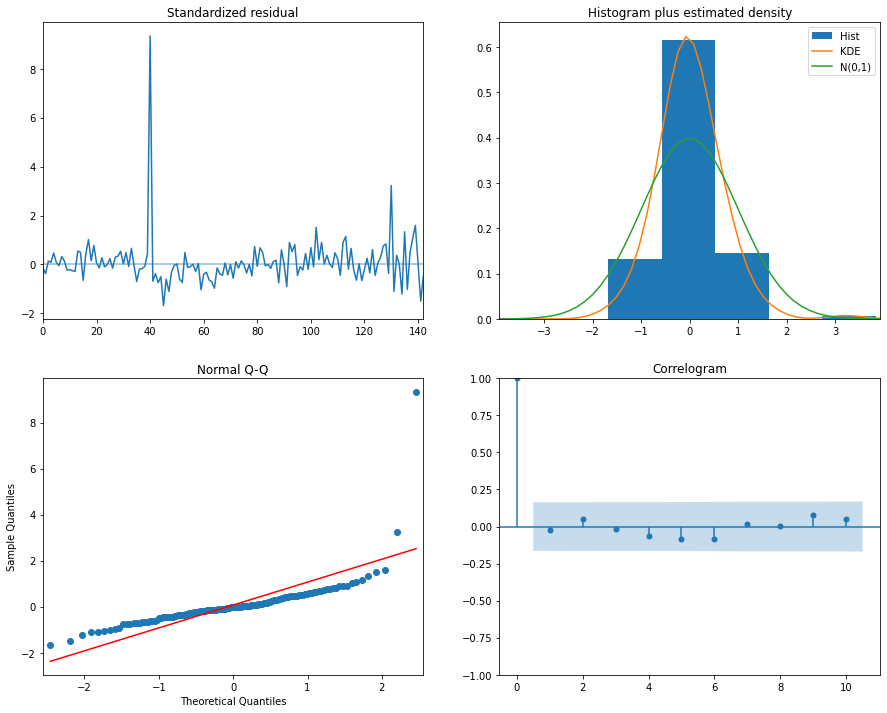

STARTED TO CONDUCT GRID SEARCHING FOR TOTAL 

STARTED TO CONDUCT CROSS-VALIDATION FOR TOTAL 

Best Models from Cross-validation is  ARIMA(1,1,1)(0,1,1)[12] intercept 



In [4]:
sl_sl = run_sarimax(country=country, y_vars=["total"], method="scaledlogit",
                    exog_var=["covid", "stringency_index", str(country) + "_travel"])

In [6]:
calculate_evaluation(sl_sl["total"], sl_sl["total_pred"])

{'MSE': 87084.32401621895,
 'RMSE': 295.10053205004385,
 'MAE': 213.14227693104007,
 'SMAPE': 15.277421537875657}

,date,total,stringency_index,covid,solomon_islands_flights,solomon_islands_hotel,solomon_islands_travel
0,2009-01-01,1602,0.0,0.0,0.000000,0.0,0.000000
1,2009-02-01,1422,0.0,0.0,0.484667,0.0,0.203672
2,2009-03-01,1249,0.0,0.0,0.000000,0.0,0.000000
3,2009-04-01,1499,0.0,0.0,0.000000,0.0,0.000000
4,2009-05-01,1393,0.0,0.0,0.000000,0.0,0.478020


training size : 144, testing size : 0
THE BENCHMARK EVALUATION FOR TOTAL 

STARTED TO CONDUCT STEPWISE SEARCHING FOR TOTAL 

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -171.518
Date:                            Sat, 10 Jun 2023   AIC                            361.035
Time:                                    16:18:19   BIC                            387.701
Sample:                                         0   HQIC                           371.871
                                            - 144                                         
Covariance Type:                              opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

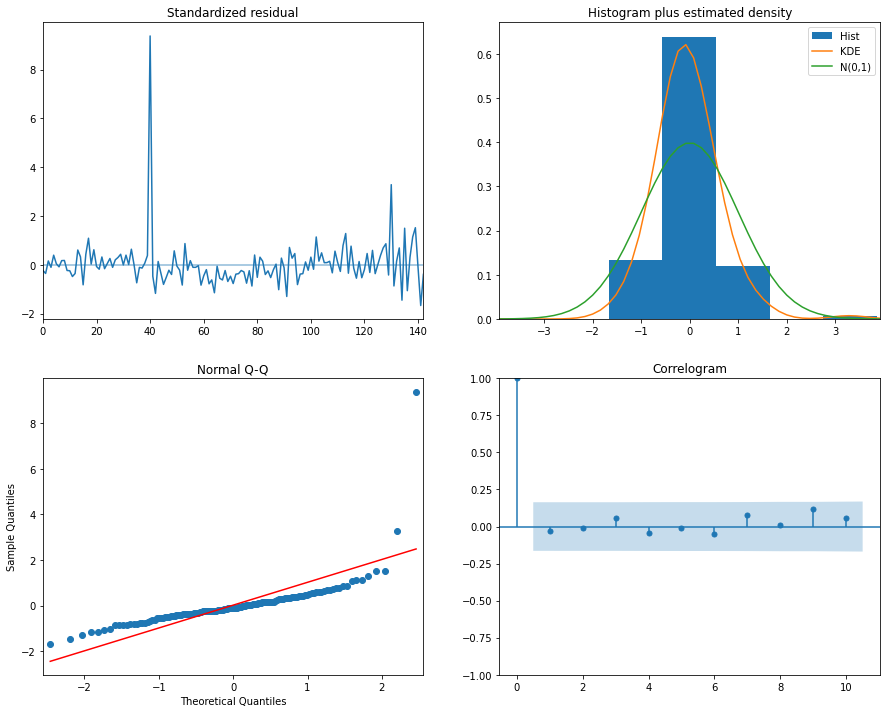

STARTED TO CONDUCT GRID SEARCHING FOR TOTAL 

STARTED TO CONDUCT CROSS-VALIDATION FOR TOTAL 

Best Models from Cross-validation is  ARIMA(1,1,1)(0,1,1)[12] intercept 



In [7]:
sl_no_gt = sarimaxs(country=country, y_vars=["total"], method="scaledlogit",
                    exog_var=["covid", "stringency_index"])

In [8]:
calculate_evaluation(sl_no_gt["total"], sl_no_gt["total_pred"])

{'MSE': 88301.34693681718,
 'RMSE': 297.1554255550741,
 'MAE': 217.3810955128908,
 'SMAPE': 15.545388451986927}

## Ratio Approach

In [8]:
from scripts.python.tsa.mtsmodel import *


SOLOMON_ISLANDS's Official and Avaition Data.

 Create Loaded Factor for SOLOMON_ISLANDS:

 Regression SOLOMON_ISLANDS:
                            WLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.939
Model:                            WLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     35.46
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.40e-08
Time:                        00:55:48   Log-Likelihood:                 54.264
No. Observations:                  24   AIC:                            -92.53
Df Residuals:                      16   BIC:                            -83.10
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975

,date,ratio,total,seats_arrivals_intl,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,pred_mean
0,2019-01-01,0.174372,1750,10036.0,0.212880,0.017319,0.176165,0.249595,0.137798,0.287962,2136.464988
1,2019-02-01,0.199662,1891,9471.0,0.208311,0.015656,0.175121,0.241501,0.134889,0.281734,1972.917412
2,2019-03-01,0.245332,2378,9693.0,0.201838,0.019636,0.160211,0.243464,0.124236,0.279439,1956.411325
3,2019-04-01,0.220940,2106,9532.0,0.242741,0.016423,0.207926,0.277556,0.168570,0.316912,2313.809745
4,2019-05-01,0.246881,2434,9859.0,0.252211,0.019415,0.211054,0.293368,0.174860,0.329562,2486.545575


,MSE,RMSE,MAE,SMAPE
mean,1.290167e+06,1135.855000,1065.215278,100.969388
naive,1.721267e+05,414.881597,268.478261,46.835106
ratio,4.875343e+04,220.801780,150.232442,26.614403


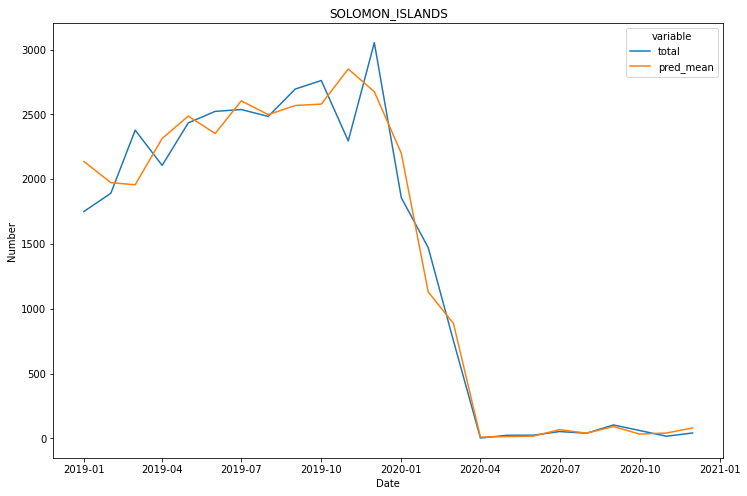

In [9]:
country = "solomon_islands"
mod = RatioPipe(country=country, data=None)
print(f"\n{country.upper()}'s Official and Avaition Data.")
mod.read_and_merge()

print(f"\n Create Loaded Factor for {country.upper()}:")
mod.transform()

print(f"\n Regression {country.upper()}:")
mod.fit()
pred_df = mod.get_prediction_df()

mean_pred, naive_pred = \
    mean_method(pred_df["total"]), naive_method(pred_df["total"])

benchmark = pd.DataFrame()
eval_name = ["mean", "naive", "ratio"]
for idx, pred in zip(eval_name, [mean_pred, naive_pred, pred_df["pred_mean"]]):
    eval_df = pd.DataFrame(calculate_evaluation(
        pred_df["total"], pred), index=[idx])
    benchmark = pd.concat([benchmark, eval_df])
display(benchmark)

ratio_viz_df = pred_df[["date", "total", "pred_mean"]].melt(id_vars="date")
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=ratio_viz_df, x="date", y="value", hue="variable")
ax.set(xlabel="Date", ylabel="Number", title=str(country).upper())
plt.show()

In [ ]:
def fit(self,
        formula="ratio~covid * stringency_index + C(quarter) +" +
        str(self.country) + "_travel",
        maxlags=maxlags):
    import statsmodels.formula.api as smf
    self.data["quarter"] = self.data["date"].dt.quarter
    self.model_df = self.data[["date", "ratio", "covid", "quarter",
                               "stringency_index", str(self.country) + "_travel"]]
    self.res = smf.ols(
        formula,
        data=self.model_df).fit()

    print(self.res.summary())

In [11]:
import sys
sys.path.append('/Applications/Stata/utilities/')
from pystata import config
config.init('be')

In [149]:
from pystata import stata

stata.pdataframe_to_data(c, force=True)

stata.run('''
gen date_var = date(date, "YMD")
format date_var %td
gen month_var = mofd(date_var)
format month_var %tm

tsset month_var
varsoc log_ratio log_gt, maxlag(8)
vec log_ratio log_gt
'''
)


. 
. gen date_var = date(date, "YMD")

. format date_var %td

. gen month_var = mofd(date_var)

. format month_var %tm

. 
. tsset month_var

Time variable: month_var, 2019m1 to 2020m12
        Delta: 1 month

. varsoc log_ratio log_gt, maxlag(8)

Lag-order selection criteria

   Sample: 2019m9 thru 2020m12                              Number of obs = 16
  +---------------------------------------------------------------------------+
  | Lag |    LL      LR      df    p     FPE       AIC      HQIC      SBIC    |
  |-----+---------------------------------------------------------------------|
  |   0 | -46.8364                      1.5359   6.10455   6.10949   6.20112  |
  |   1 |  -40.448  12.777    4  0.012 1.14938     5.806   5.82083   6.09572  |
  |   2 | -38.6856  3.5248    4  0.474 1.57334    6.0857   6.11043   6.56857  |
  |   3 | -28.7918  19.788    4  0.001 .818532   5.34897   5.38359   6.02499  |
  |   4 | -22.0696  13.444    4  0.009 .689961    5.0087   5.05321   5.87787  |
  

In [150]:
from statsmodels.tsa.vector_ar.vecm import *
lag_order = select_order(c[["log_gt", "log_ratio"]], maxlags=10, deterministic="ci", seasons=12)
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,-131.6*,-130.3*,1.339e-57,-131.9*
1,-130.8,-129.3,4.740e-58,-131.1
2,-128.1,-126.5,1.886e-57,-128.5
3,-126.7,-124.9,2.714e-57,-127.1
4,-126.6,-124.6,1.136e-57,-127.0
5,-125.8,-123.6,1.056e-57,-126.3
6,-123.0,-120.7,7.586e-57,-123.5
7,-125.8,-123.3,2.161e-58*,-126.3
8,-121.9,-119.2,5.013e-57,-122.4
9,-123.9,-121.0,3.332e-58,-124.4


In [163]:
rank_test = select_coint_rank(c[["log_gt", "log_ratio"]], 0, 1, method="trace",
                              signif=0.05)
rank_test.rank

0

In [164]:
rank_test.summary()

r_0,r_1,test statistic,critical value
0,2,10.53,15.49


In [165]:
model = VECM(c[["log_gt", "log_ratio"]], deterministic="ci",
             k_ar_diff=1,  # =3
             coint_rank=rank_test.rank)  # =

In [166]:
res = model.fit()

In [167]:
res.summary()

ValueError: shapes (0,2) and (3,22) not aligned: 2 (dim 1) != 3 (dim 0)

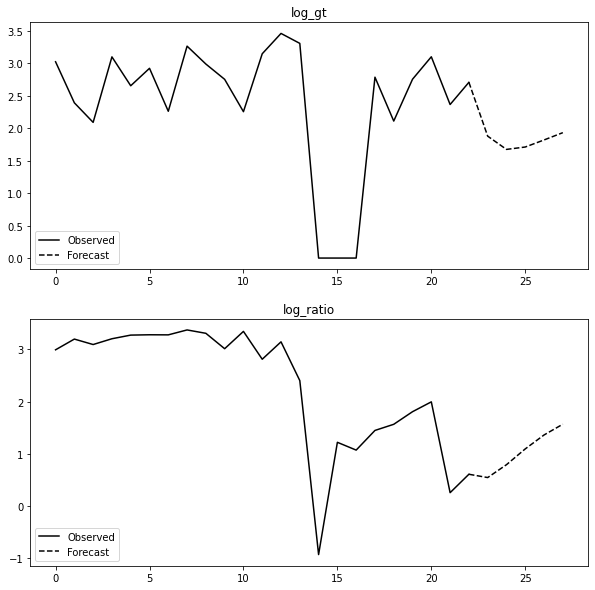

In [159]:
res.plot_forecast(steps=5, plot_conf_int=False)

In [161]:
res.test_granger_causality(caused="log_ratio", signif=0.05).summary()

Test statistic,Critical value,p-value,df
3.764,4.130,0.061,"(1, 34)"


### Future Forecasting

In [11]:
gt = mod.read_trends_data()
gt.columns = [col.replace(" ", "_") for col in gt.columns]
solomon_si = mod.read_covid_data()

In [12]:
solomon_si_fu = (solomon_si[solomon_si.date >="2021-01-01"]
                 .dropna()
                 .reset_index().drop("index", axis=1))
temp_fu = (solomon_si_fu.merge(
    gt[["date", "solomon_islands_flights", "solomon_islands_travel"]],
    how="left", on="date"))
temp_fu["covid"] = (temp_fu.date >= "2020-03-12").astype(int)
temp_fu["quarter"] = temp_fu["date"].dt.quarter
temp_fu.columns = [col.replace(" ", "_") for col in temp_fu.columns]
temp_fu = temp_fu.dropna() 

In [21]:
uni_future = (best_mod.get_forecast(
    exog=temp_fu[["covid", "stringency_index", "solomon_islands_travel"]],
    steps=len(temp_fu))
    .summary_frame())
uni_future.columns.name = None
for col_idx, col in enumerate(uni_future.columns):
    for row_idx, _ in enumerate(uni_future[col]):
        uni_future.iloc[row_idx, col_idx] = inverse_scaledlogit(
            uni_future.iloc[row_idx, col_idx], upper, lower)

uni_future = (uni_future.reset_index()
              .drop("index", axis=1))
uni_future.columns = [col.replace("mean", "uni") for col in uni_future.columns]
uni_future["date"] = temp_fu["date"]
uni_future.head(5)

AttributeError: 'RegressionResults' object has no attribute 'get_forecast'

In [16]:
future = mod.res.get_prediction(temp_fu).summary_frame()
future["date"] = temp_fu["date"]

In [17]:
aviation_path = os.getcwd() + "/data/tourism/aviation_seats_flights_pic.xlsx"
aviation = pd.read_excel(aviation_path)

sb_avi = (aviation[(aviation.ISO == "SB") & (aviation.Aircraft_type == "passenger")]
          .reset_index()
          .drop("index", axis=1)
          [["Date", "Seats_arrivals_intl", "Seats_arrivals_total"]])
sb_avi["Date"] = pd.to_datetime(sb_avi["Date"])
sb_avi["Month"], sb_avi["Year"] = sb_avi["Date"].dt.month, sb_avi["Date"].dt.year
sb_avi = sb_avi.groupby(["Year", "Month"]).sum().reset_index()
sb_avi["date"] = [str(y) + "-" + str(m)
                  for y, m in zip(sb_avi.Year, sb_avi.Month)]
sb_avi["date"] = pd.to_datetime(sb_avi["date"])
sb_avi_future = sb_avi[sb_avi.date >= "2021-01-01"].reset_index().drop("index", axis=1)
sb_avi_future.head(5)

,Year,Month,Seats_arrivals_intl,Seats_arrivals_total,date
0,2021,1,1408,1408,2021-01-01
1,2021,2,1640,1640,2021-02-01
2,2021,3,1632,1632,2021-03-01
3,2021,4,2164,2164,2021-04-01
4,2021,5,1292,1444,2021-05-01


In [18]:
future_colnames = [col for col in future.columns if col.startswith('mean')]
for col in future_colnames:
    if "se" in col:
        pass
    else:
        colname = col.replace("mean", "lf")
        future[colname] = sb_avi_future["Seats_arrivals_intl"] * future[col]
future.head(5)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,date,lf,lf_ci_lower,lf_ci_upper
0,-0.013964,0.026056,-0.069200,0.041273,-0.099639,0.071712,2021-01-01,-19.660781,-97.433629,58.112068
1,-0.021852,0.032473,-0.090691,0.046987,-0.116869,0.073164,2021-02-01,-35.837449,-148.733861,77.058963
2,-0.017247,0.028630,-0.077941,0.043447,-0.106539,0.072045,2021-03-01,-28.147308,-127.199789,70.905173
3,0.032983,0.025983,-0.022098,0.088064,-0.052592,0.118559,2021-04-01,71.375570,-47.819590,190.570729
4,0.026719,0.025154,-0.026605,0.080043,-0.057737,0.111174,2021-05-01,34.520820,-34.373918,103.415558


In [19]:
forecast = future.iloc[:, -4:]
forecast = forecast.merge(uni_future)
forecast.to_csv(os.getcwd() + "/data/tourism/solomon_islands/model/future.csv", encoding="utf-8")

NameError: name 'uni_future' is not defined

ValueError: Could not interpret value `uni` for parameter `y`

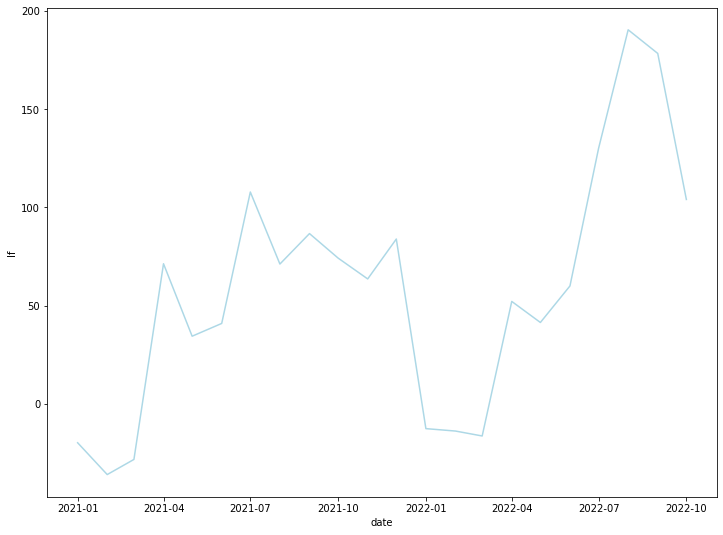

In [20]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.lineplot(data=forecast, x="date", y="lf", color="lightblue")
sns.lineplot(data=forecast, x="date", y="uni",  color="yellow")
ax.fill_between(data=forecast, x="date", y1="lf_ci_lower",
                y2="lf_ci_upper", alpha=0.2, color="lightblue")
ax.fill_between(data=forecast, x="date", y1="uni_ci_lower",
                y2="uni_ci_upper", alpha=0.2, color="yellow")
plt.axvline(datetime(2020, 12, 31), linestyle="--", color="green")
plt.show()